## EXPLORATORY DATA ANALYSIS

This notebook takes the cleaned data (before filtering for 7 week activity) and does an exploratory data analysis (EDA) to know more about the dataset.
Python modules needed are imported here:

In [1]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import spearmanr

### 1) Descriptive statistics

We will start doing a quick analysis on each of the variables:

In [2]:
df = pd.read_csv("data/weekly_anonymous_v3.csv")

In [3]:
df.describe(include='all') # include='all' for more info

,patient_id,week,score,gender,birthdate,Alternating Attention,Attention,Auditory Gnosis,Body Schema,Comprehension,...,Spatial Visualization,Sustained Attention,Time Estimation,Time Orientation,Visoconstructive Praxis,Visual Gnosis,Visuospatial Skills,Vocabulary,Working M.,Writing
count,417536,417536,417536.000000,417536.000000,417057,69652.000000,364539.000000,15094.000000,28522.000000,75675.000000,...,28405.000000,271609.000000,18027.000000,20240.000000,27639.000000,150163.000000,163358.000000,176487.000000,312741.000000,7390.000000
unique,19642,521,NaN,NaN,13679,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e322be2d,18-2018,NaN,NaN,2017-11-21,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,432,1967,NaN,NaN,634,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.419955,1.454052,NaN,0.234442,0.417304,0.239360,0.376354,0.402868,...,0.415294,0.388555,0.583925,0.840974,0.227257,0.513770,0.344251,0.429595,0.365284,0.425152
std,NaN,NaN,0.187377,0.497885,NaN,0.255837,0.218685,0.196313,0.287708,0.232786,...,0.277883,0.256198,0.271553,0.224568,0.199303,0.256232,0.222766,0.242323,0.231359,0.261199
min,NaN,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.285000,1.000000,NaN,0.024600,0.249200,0.098900,0.148100,0.209400,...,0.200000,0.178600,0.388900,0.760000,0.096700,0.317200,0.180000,0.235100,0.187100,0.200000
50%,NaN,NaN,0.412100,1.000000,NaN,0.133350,0.400950,0.194400,0.274650,0.375000,...,0.380000,0.348200,0.562500,0.921700,0.170000,0.499800,0.308800,0.400000,0.327000,0.400000
75%,NaN,NaN,0.542643,2.000000,NaN,0.384000,0.566600,0.320600,0.591987,0.556200,...,0.600000,0.560733,0.829800,1.000000,0.303538,0.700000,0.467500,0.599500,0.507350,0.600000


All scores are between 0 and 1, and the number of patients is now of 19642.

### 2) Gender and age distributions

In [4]:
gender_dist = df.drop_duplicates(subset='patient_id')['gender'].value_counts()
gender_dist

1    10898
2     8744
Name: gender, dtype: int64

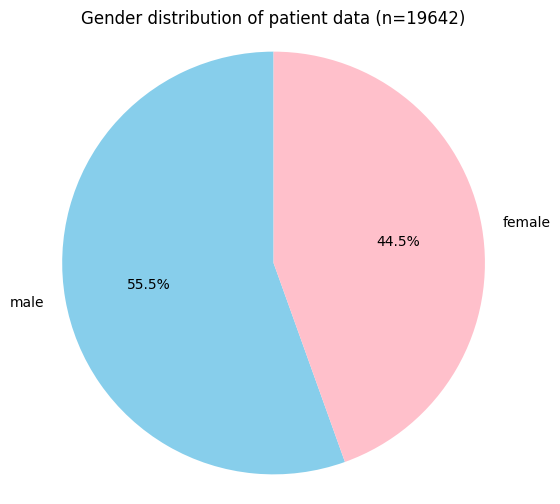

In [6]:
# GENDER DISTRIBUTION
gender_labels = ['male', 'female']
gender_counts = gender_dist.values

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels= gender_labels, autopct='%1.1f%%', startangle=90, colors= ['skyblue','pink'])
plt.title('Gender distribution of patient data (n=19642)')
plt.axis('equal') # Circle
# plt.savefig("Gender_all.png")
plt.show()

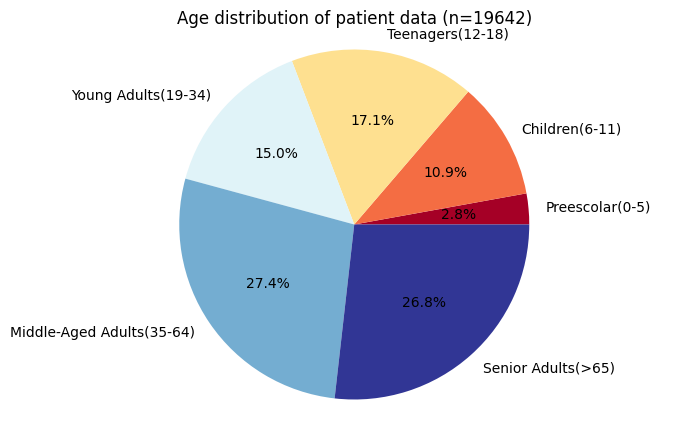

In [9]:
# AGE DISTRIBUTION
# current_date = datetime.datetime(2023, 10, 26)
current_year = 2023
df2 = df.copy()
df2['birth_year'] = pd.to_datetime(df2['birthdate']).dt.year

df2["age"] = current_year - df2['birth_year']
bins = [0, 5, 11, 18, 35, 65, 130]
labels = ['Preescolar(0-5)', 'Children(6-11)', 'Teenagers(12-18)', 'Young Adults(19-34)', 'Middle-Aged Adults(35-64)', 'Senior Adults(>65)']

df2['age_group'] = pd.cut(df2['age'], bins=bins, labels=labels)

age_dist = df2.drop_duplicates(subset='patient_id')['age_group'].value_counts()

age_counts = age_dist.reindex(labels, fill_value=0).values

colors = plt.get_cmap('RdYlBu', len(labels))
plt.figure(figsize=(8, 5))
plt.pie(age_counts, labels= labels, autopct='%1.1f%%', startangle=0, colors= colors(np.arange(len(labels))))
plt.title('Age distribution of patient data (n=19642)')
plt.axis('equal') # Circle
plt.savefig("age_all.png")
plt.show()

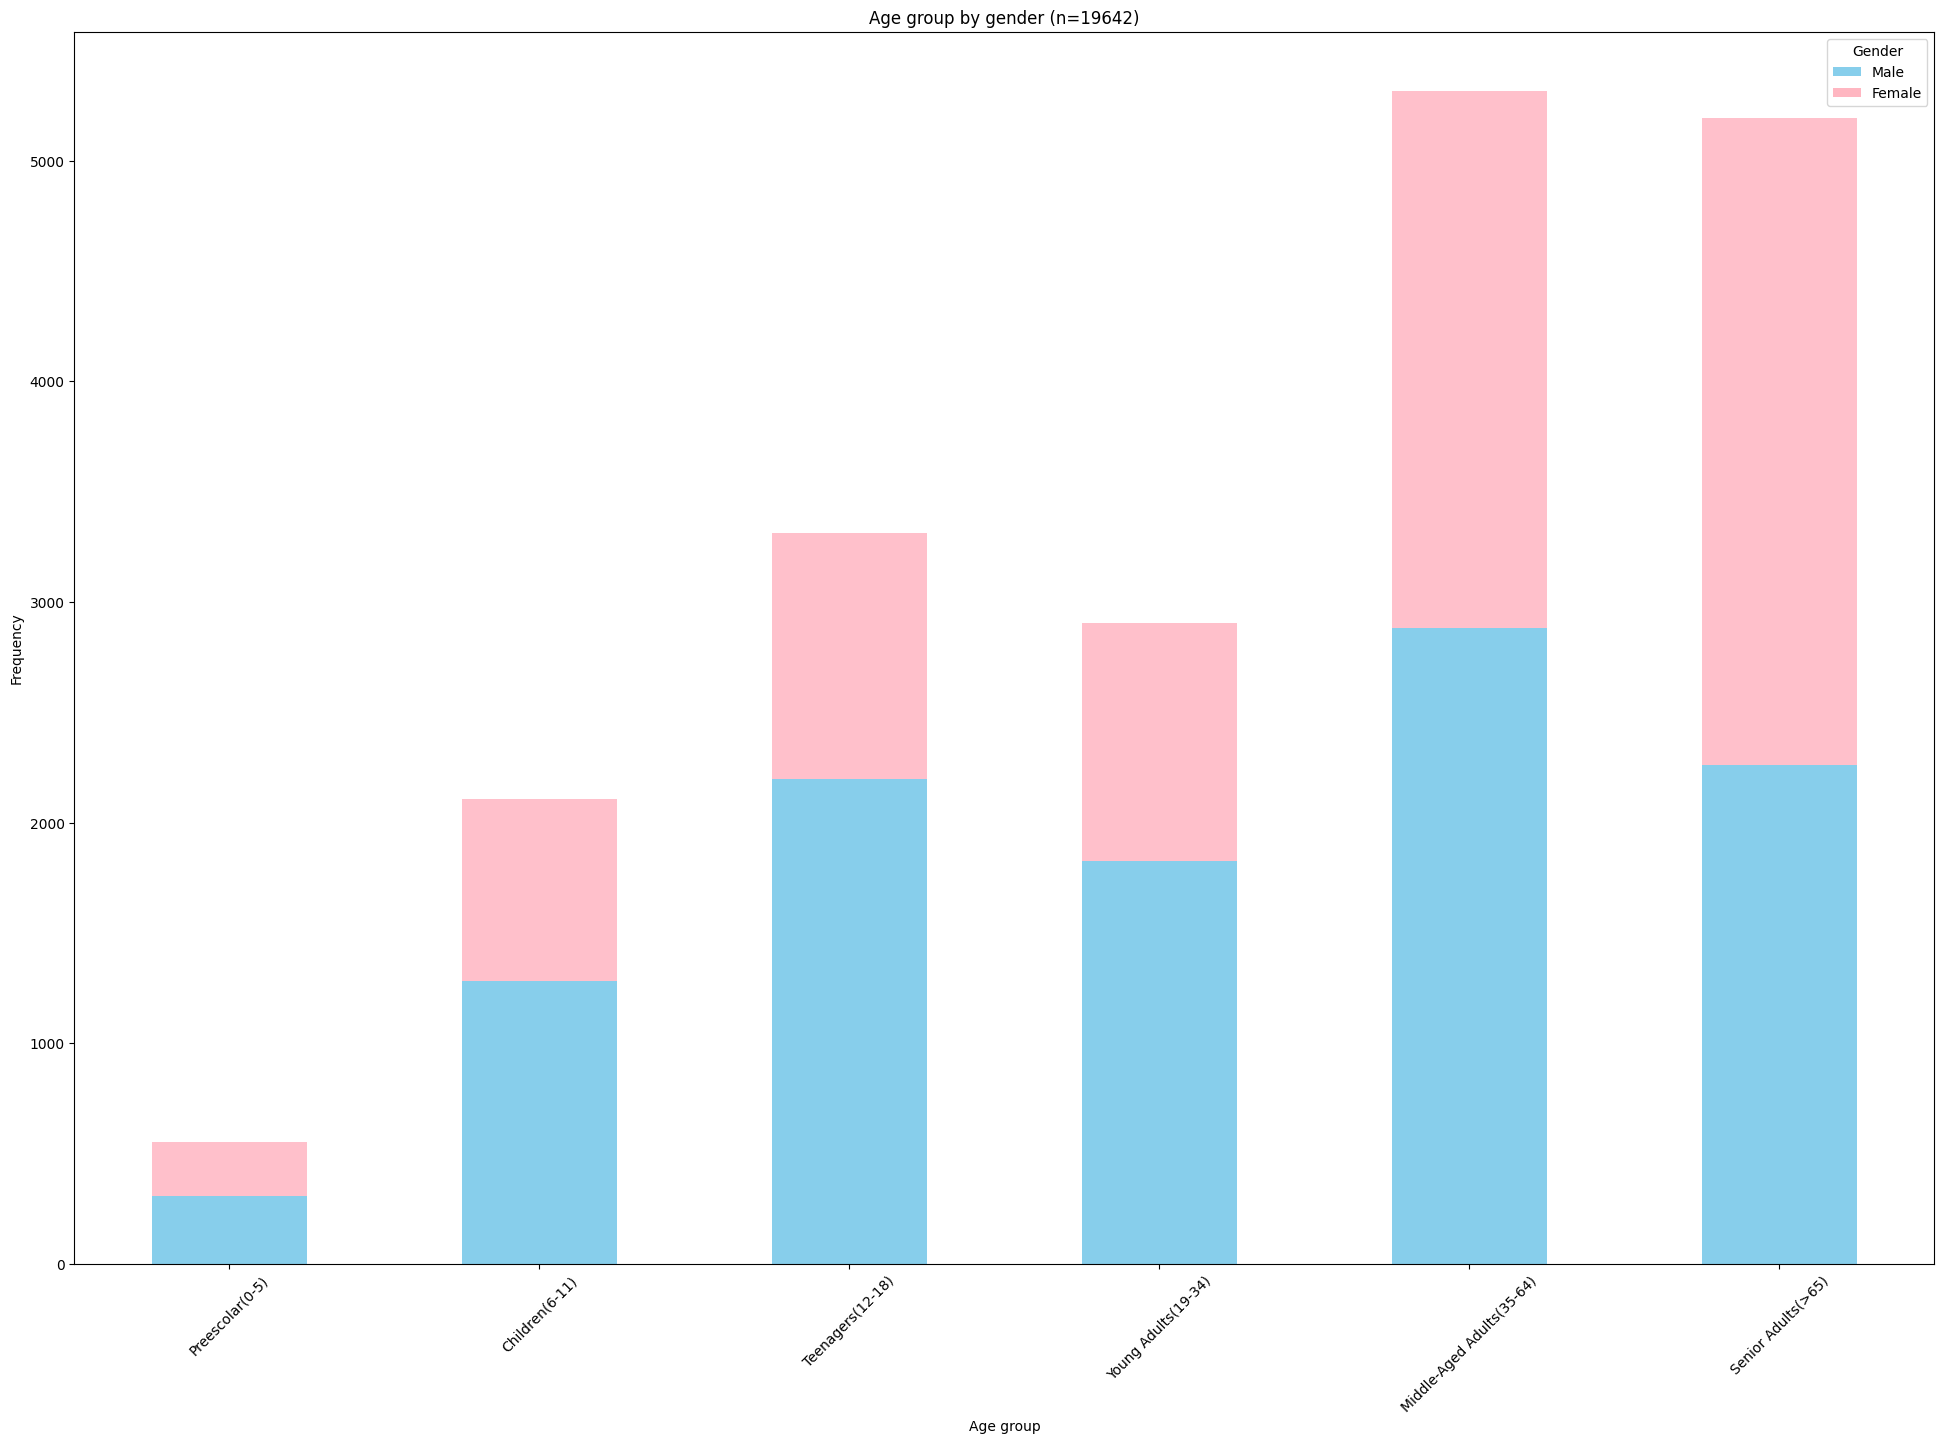

In [26]:
# GENDER AND AGE COMBINATION

unique_patient_data = df2.drop_duplicates(subset='patient_id')
grouped_data = unique_patient_data.groupby(['age_group', 'gender']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind= 'bar', stacked = True, figsize=(24,16), color=['skyblue', 'pink'])

plt.title("Age group by gender (n=19642)")
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

male_patch = plt.bar(0, 0, color='skyblue', label='Male')
female_patch = plt.bar(0, 0, color='lightpink', label='Female')
ax.legend(handles=[male_patch, female_patch], title='Gender')

plt.savefig("agegender_all.png")
plt.show()
# plt.savefig("agegroup_gender.png")

### 3) Score distributions

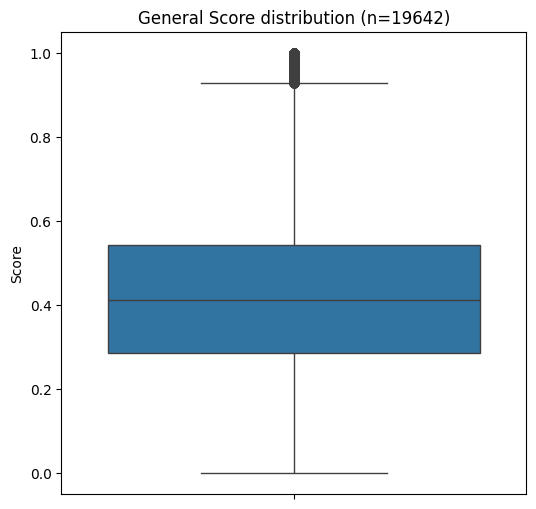

In [3]:
# GENERAL SCORE BOXPLOT
plt.figure(figsize=(6, 6))
sns.boxplot(y='score', data=df)
plt.title('General Score distribution (n=19642)')
plt.ylabel('Score')
# plt.savefig("score_all.png")
plt.show()
                

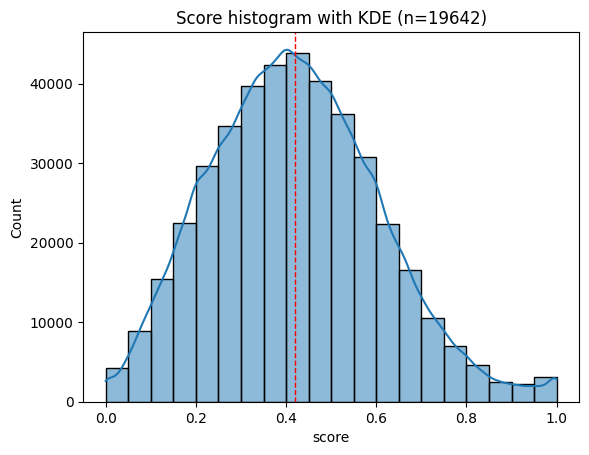

In [5]:
# SCORE DISTRIBUTION PLOT
sns.histplot(df['score'], kde=True, bins=20)
plt.title("Score histogram with KDE (n=19642)")
mean_value = df['score'].mean()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)

# plt.savefig("KDE_all.png")
plt.show()

In [13]:
df.columns[-38:]

Index(['Alternating Attention', 'Attention', 'Auditory Gnosis', 'Body Schema',
       'Comprehension', 'Decision Making', 'Discrimination', 'Episodic Memory',
       'Executive Functions', 'Expression', 'Flexibility', 'Gnosis',
       'Hemineglect', 'Inhibition', 'Language', 'Memory', 'Naming',
       'Orientation', 'Place Orientation', 'Planning', 'Praxis',
       'Processing Speed', 'Reading', 'Reasoning', 'Selective Attention',
       'Semantic Memory', 'Social Cognition', 'Spatial Relation',
       'Spatial Visualization', 'Sustained Attention', 'Time Estimation',
       'Time Orientation', 'Visoconstructive Praxis', 'Visual Gnosis',
       'Visuospatial Skills', 'Vocabulary', 'Working M.', 'Writing'],
      dtype='object')

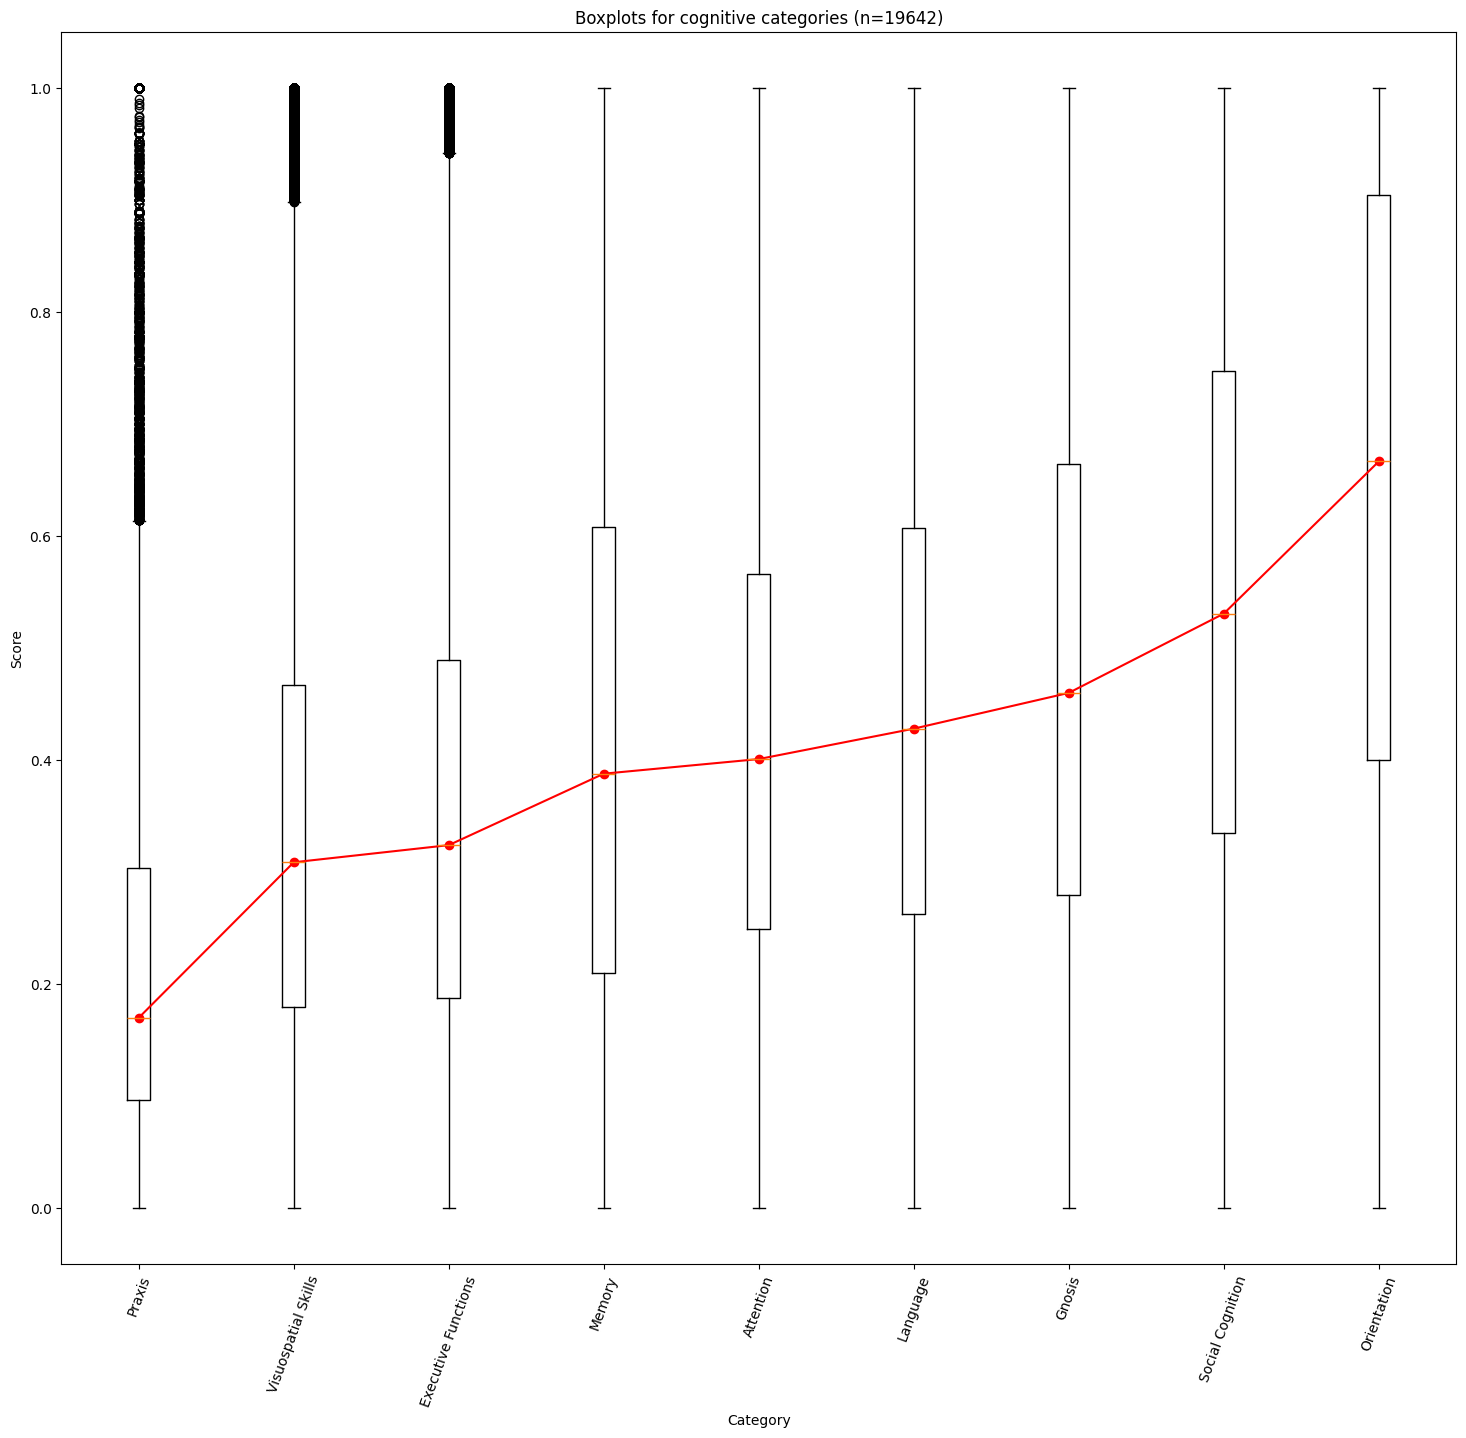

In [9]:
# AREA SCORE BOXPLOTS
areas = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]]
areas = areas.iloc[:, 0:9]
data_list =[]
for area in areas:
    area_data = {'area': area, 'score': df[area].dropna().tolist()}
    data_list.append(area_data)

areas_df = pd.DataFrame(data_list)

# Sort the areas_df by the median score in ascending order
areas_df['median'] = areas_df['score'].apply(np.median)
areas_df = areas_df.sort_values(by='median', ascending=True)

# Reset the index of the areas_df
areas_df = areas_df.reset_index(drop=True)

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(18,16))

# Plot the boxplots for each area
for i, area_data in areas_df.iterrows():
    ax.boxplot(area_data['score'], positions=[i], labels=[area_data['area']])
    
# Plot a line connecting the medians
ax.plot(areas_df.index, areas_df['median'], color='red', marker='o')

# Set the title, labels, and ticks
ax.set_title('Boxplots for cognitive categories (n=19642)')
ax.set_xlabel('Category')
ax.set_xticklabels(labels=areas_df['area'], rotation=70)
ax.set_ylabel('Score')
# Show the plot
plt.savefig("areabox_all.png")
plt.show()

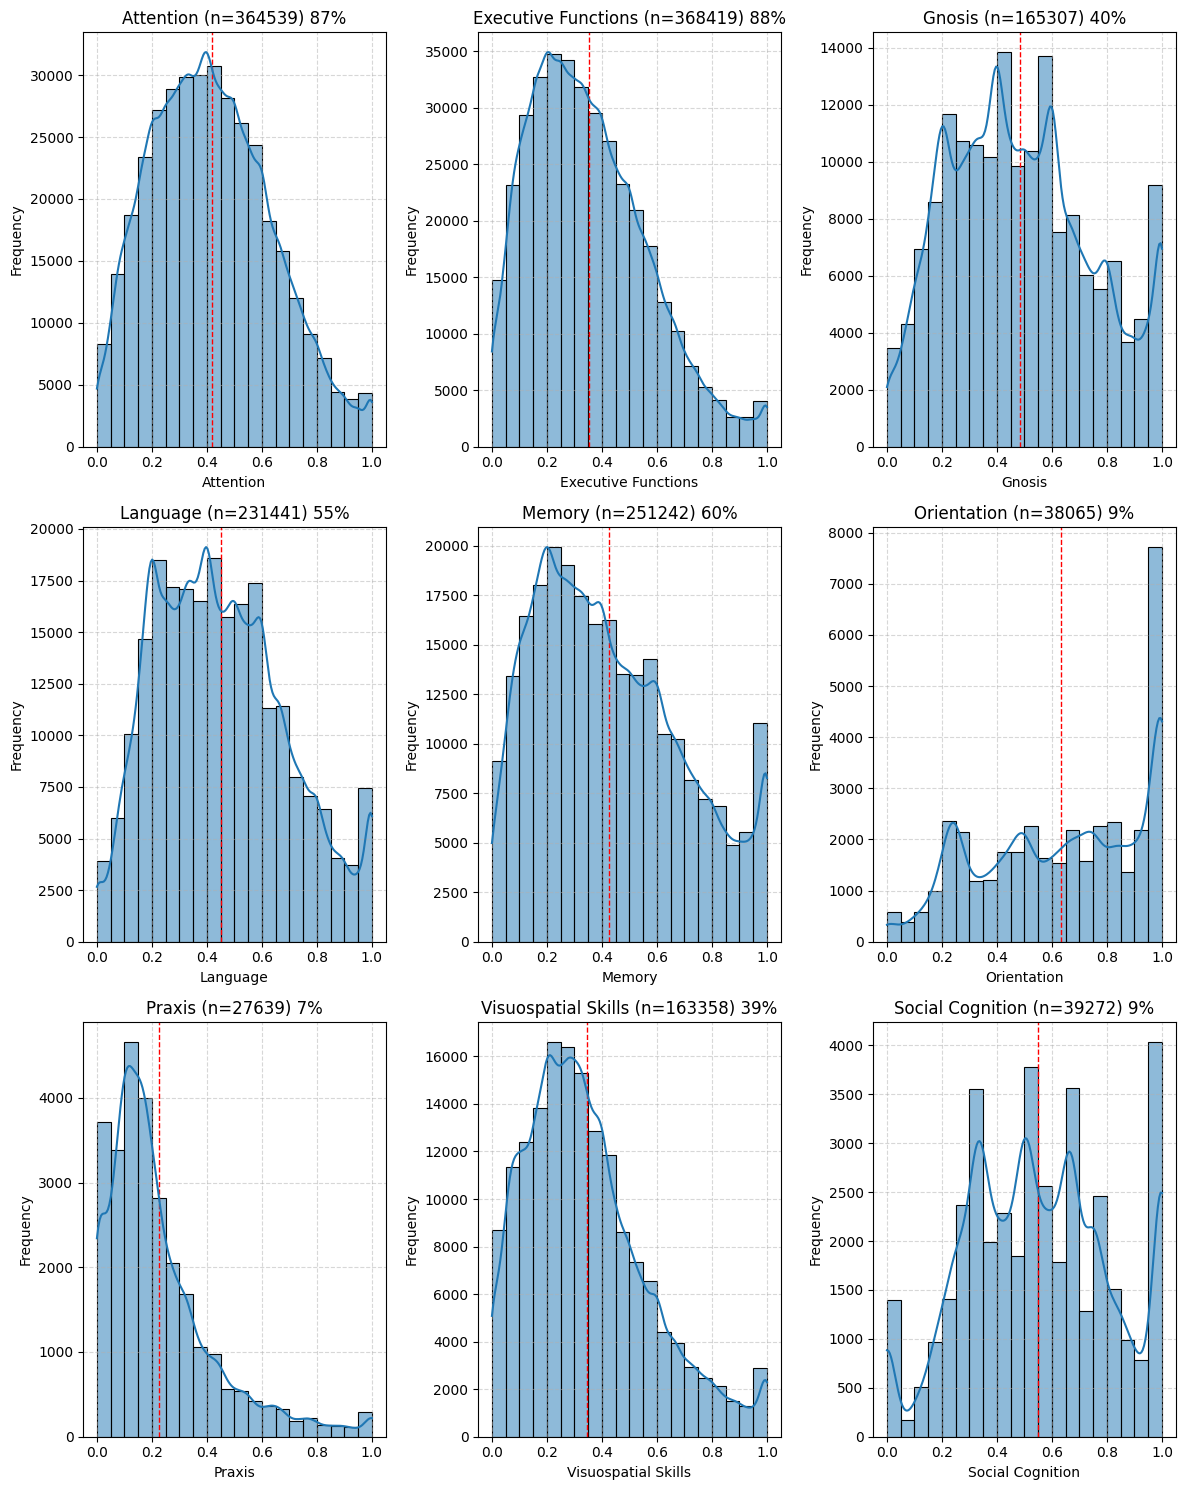

In [35]:
# AREA SCORE DISTRIBUTION PLOT
num_columns = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,15))
fig.subplots_adjust(hspace=0.4, wspace= 0.4)

style = { 'histtype': 'bar', 'edgecolor': 'black', 'alpha': 0.7}

for i, column in enumerate(num_columns):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    
#     df[column].plot(kind='hist', bins=20,**style, ax=ax, 
#   

    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.5) # grid
    
    # vertical line at mean
    mean_value = df[column].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
    
    # KDE curve
    sns.histplot(df[column], ax=ax, kde=True, bins=20)
    ax.set_title(f'{column} (n={df[column].count()}) {round(100*df[column].count()/df.shape[0])}%')

plt.tight_layout()
plt.show()

### 4) Area representation

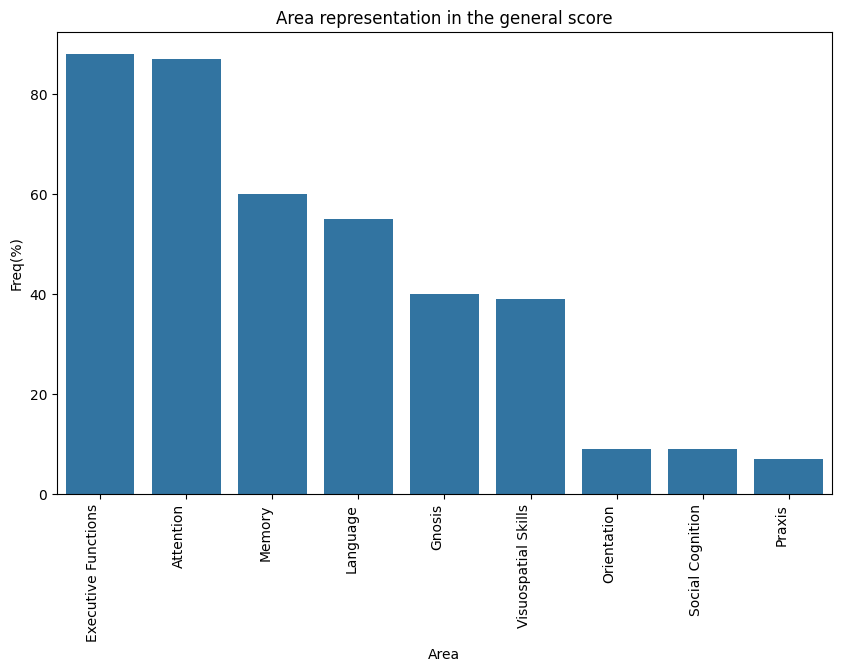

In [37]:
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

# AREA REPRESENTATION
num_columns = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]]

area_freq = pd.DataFrame()
area_freq['Area'] = num_columns.columns
area_freq['Freq(%)'] = [round(100*df[column].count()/df.shape[0]) for column in num_columns]

area_freq = area_freq.sort_values("Freq(%)", ascending= False)
area_freq.reset_index(drop=True, inplace=True)

# colors = sns.color_palette('husl', 38)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=area_freq['Area'], y=area_freq['Freq(%)'], color='C0')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_title('Area representation in the general score')
plt.show()

In [38]:
# AREA REPRESENTATION IN AGE GROUPS
num_columns = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]]

ages = df2['age_group'].unique()

age_list = []
for age in ages:
    age_dict = {'age_group': age, 'data' : df2[df2['age_group'] == age]}
    age_list.append(age_dict)
    
area_freq = pd.DataFrame()
area_freq['Area'] = num_columns.columns
area_freq['Children Freq(%)'] = [round(100*age_list[3]['data'][column].count()/age_list[3]['data'].shape[0]) for column in num_columns]
area_freq['Senior Adults Freq(%)'] = [round(100*age_list[1]['data'][column].count()/age_list[1]['data'].shape[0]) for column in num_columns]
area_freq['Middle-Aged Freq(%)'] = [round(100*age_list[0]['data'][column].count()/age_list[0]['data'].shape[0]) for column in num_columns]
area_freq['Young Adults Freq(%)'] = [round(100*age_list[2]['data'][column].count()/age_list[2]['data'].shape[0]) for column in num_columns]
area_freq['Teenagers Freq(%)'] = [round(100*age_list[4]['data'][column].count()/age_list[4]['data'].shape[0]) for column in num_columns]
area_freq['Preescolar Freq(%)'] = [round(100*age_list[6]['data'][column].count()/age_list[6]['data'].shape[0]) for column in num_columns]


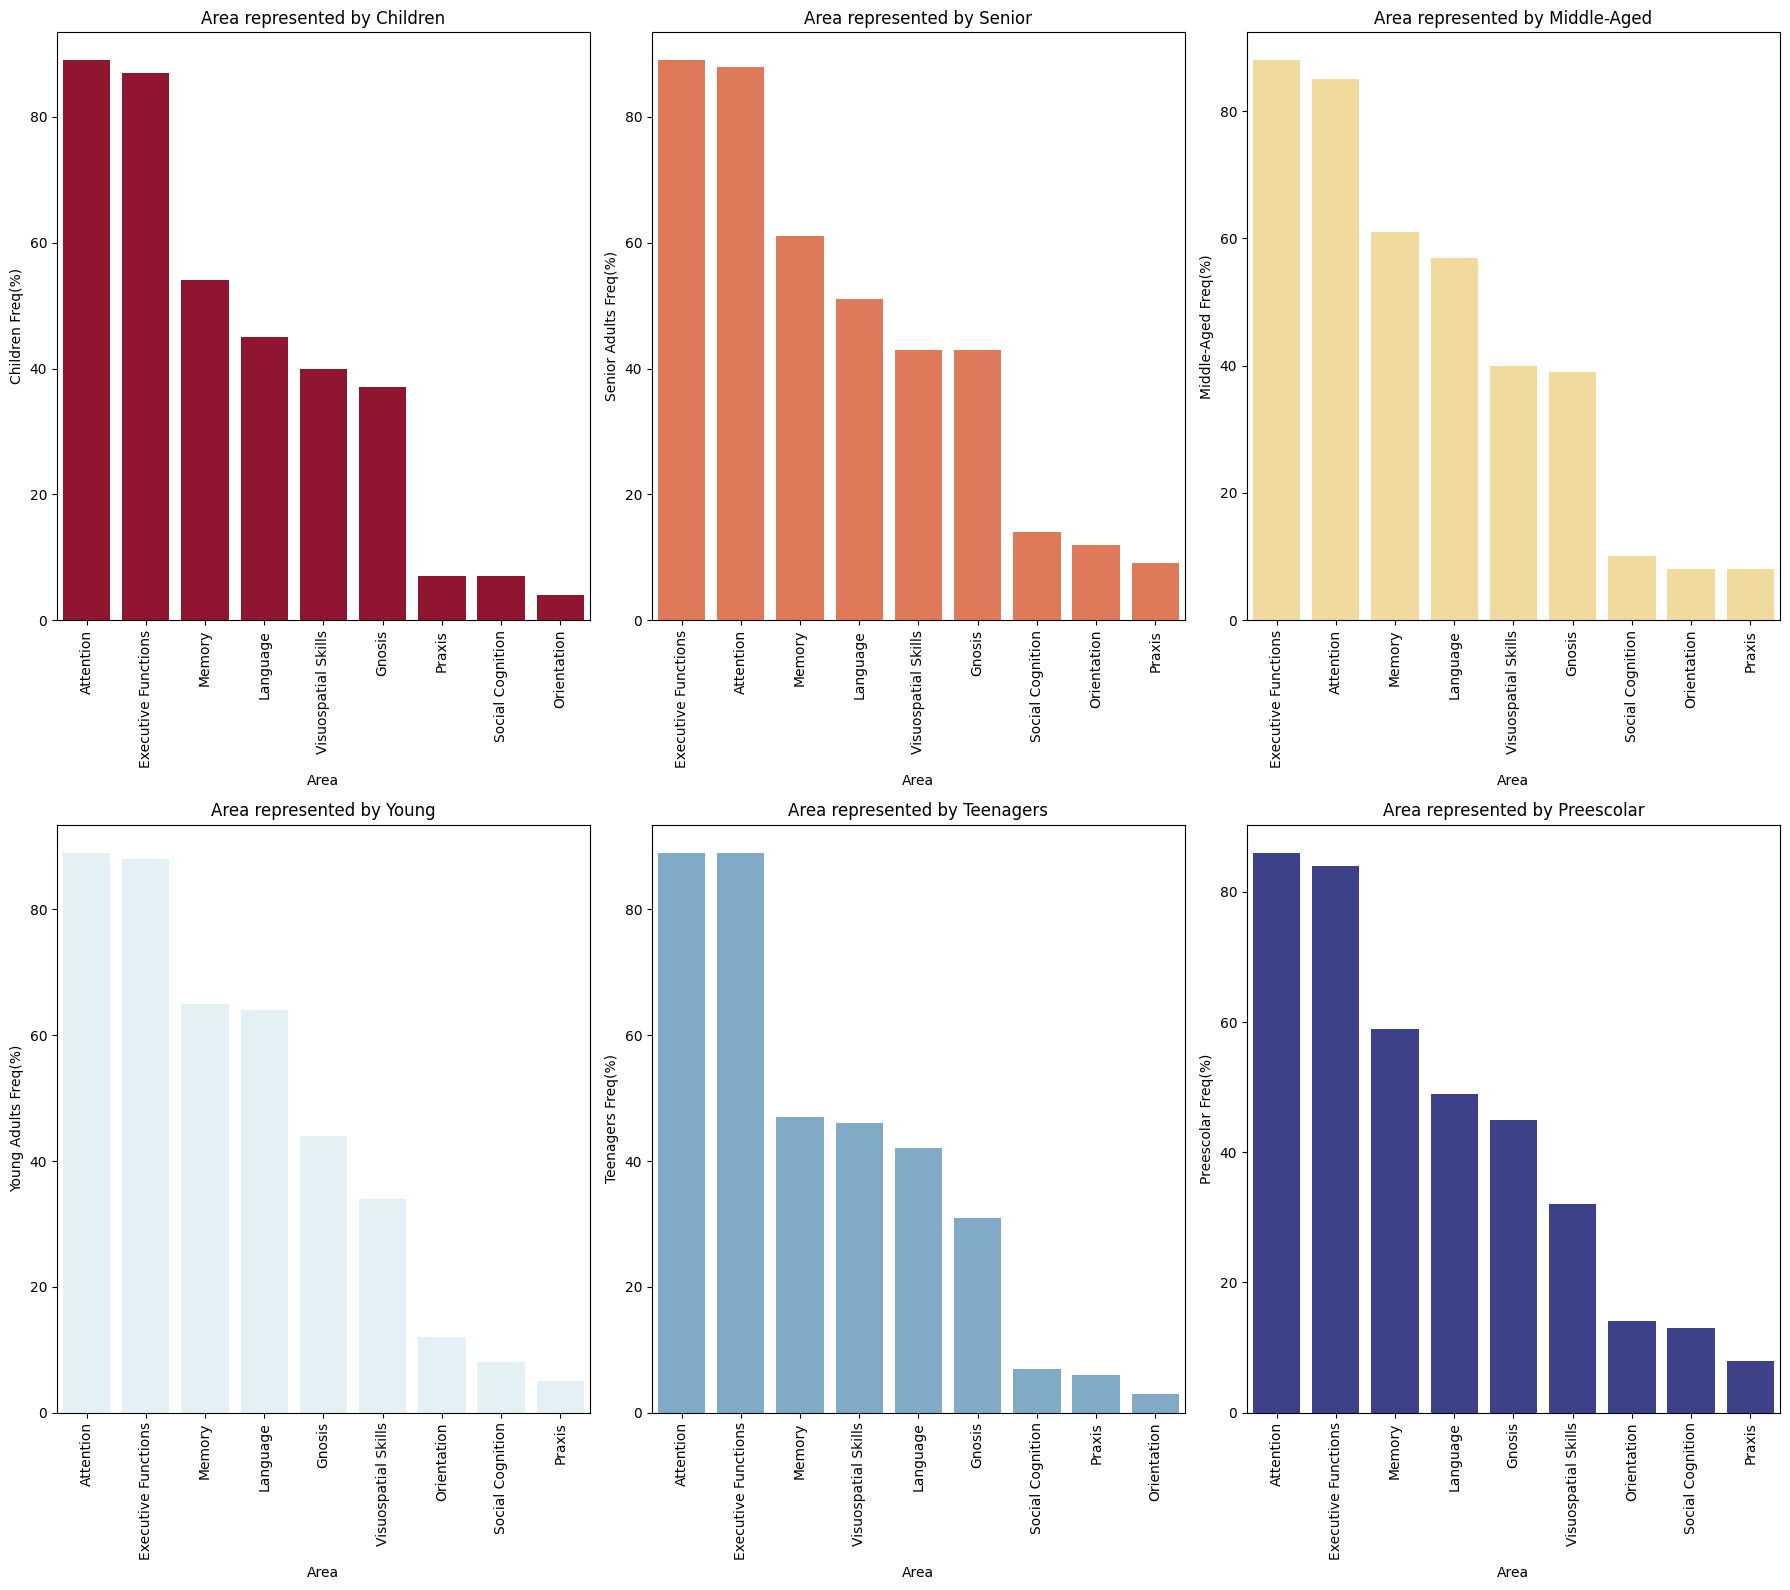

In [39]:
warnings.filterwarnings('ignore')

ages = [area_freq.columns[1], area_freq.columns[2], area_freq.columns[3], area_freq.columns[4], area_freq.columns[5], area_freq.columns[6]]
colors = plt.get_cmap('RdYlBu', len(ages))
# first_four_colors = [colors(i) for i in range(4)]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 16))
axes = axes.flatten()

for i, column in enumerate(ages):
    # Plot the bar chart
    area_freq = area_freq.sort_values(column, ascending=False)
    area_freq.reset_index(drop=True, inplace=True)
    sns.barplot(x=area_freq['Area'], y=area_freq[column], color=colors(i), ax=axes[i])
    
    # Set subplot title
    agegroup = column.split()
    axes[i].set_title('Area represented by '+ agegroup[0])
    axes[i].set_xticklabels(rotation=90, labels=area_freq['Area'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [40]:
# AREA REPRESENTATION IN GENDER
num_columns = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]]

genders = df['gender'].unique()

genders_list = []
for gender in genders:
    genders_dict = {'gender': gender, 'data' : df[df['gender'] == gender]}
    genders_list.append(genders_dict)
    
area_freq = pd.DataFrame()
area_freq['Area'] = num_columns.columns

area_freq['Male'] = [round(100*genders_list[0]['data'][column].count()/genders_list[0]['data'].shape[0]) for column in num_columns]
area_freq['Female'] = [round(100*genders_list[1]['data'][column].count()/genders_list[1]['data'].shape[0]) for column in num_columns]


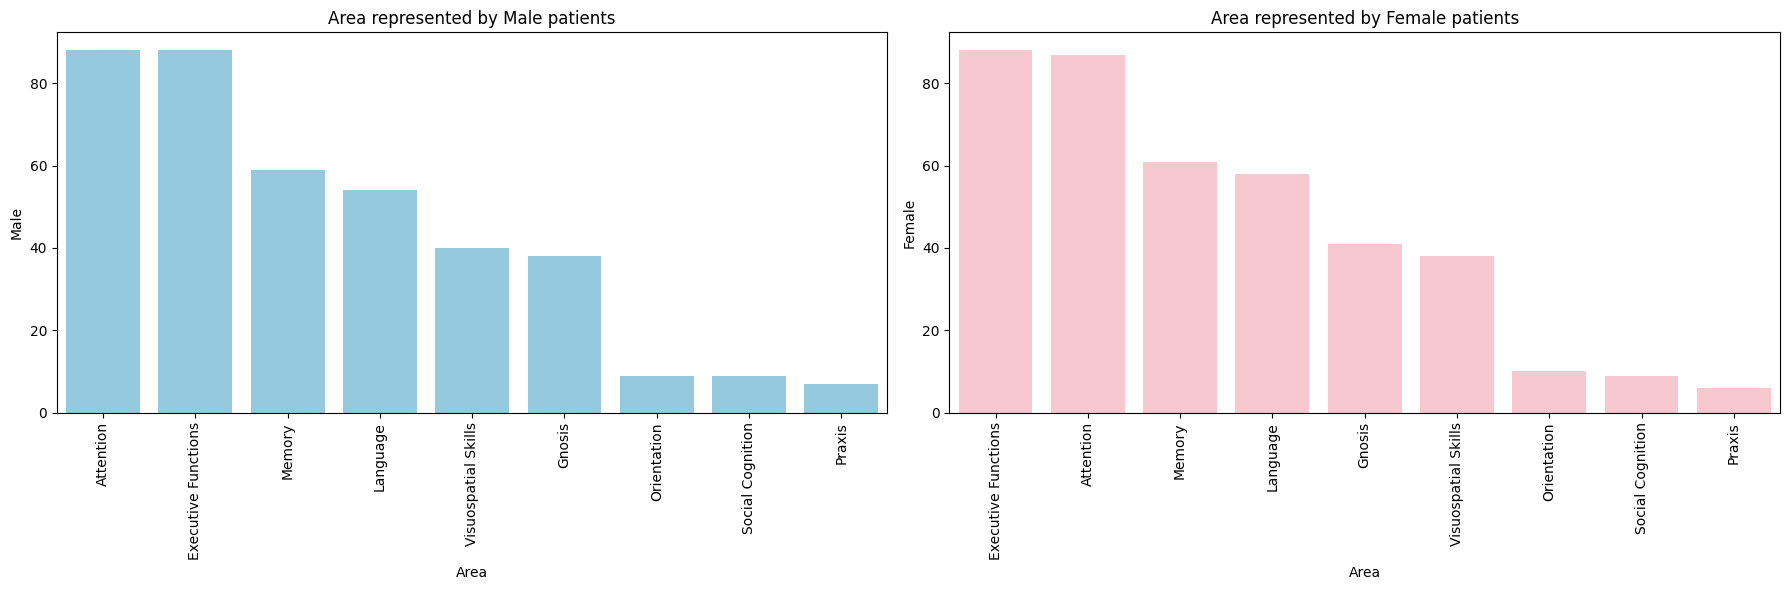

In [41]:
warnings.filterwarnings('ignore')

genders = [area_freq.columns[1], area_freq.columns[2]]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axes = axes.flatten()

colors = ['skyblue', 'pink']
for i, column in enumerate(genders):
    # Plot the bar chart
    area_freq = area_freq.sort_values(column, ascending=False)
    area_freq.reset_index(drop=True, inplace=True)
    sns.barplot(x=area_freq['Area'], y=area_freq[column], color=colors[i], ax=axes[i])
    
    axes[i].set_title('Area represented by '+ column + ' patients')
    axes[i].set_xticklabels(rotation=90, labels=area_freq['Area'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 5) Score values with age group and gender

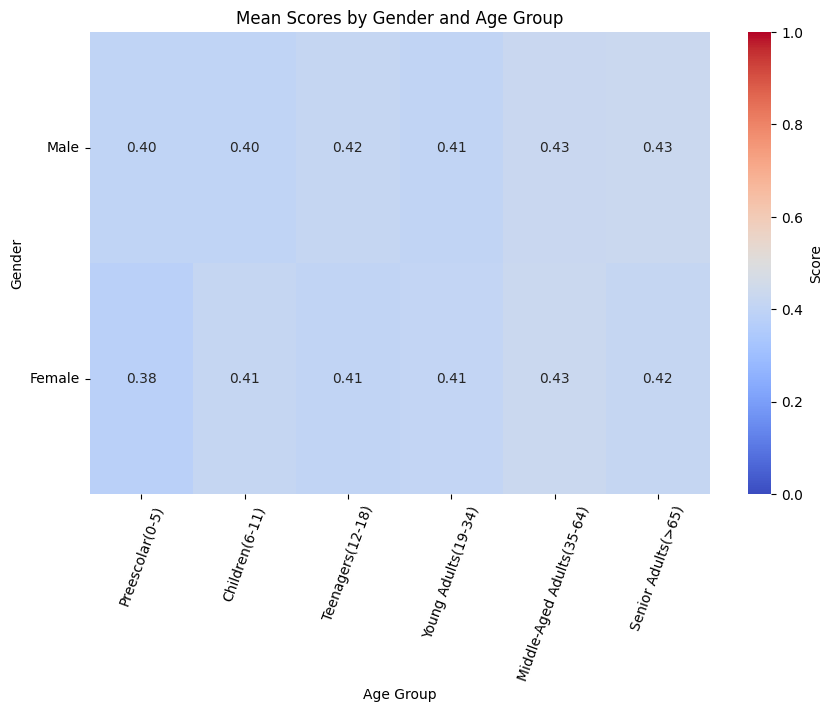

In [48]:
df_rel = df2[['score', 'gender', 'age_group']]
df_grp = df_rel.groupby(['gender', 'age_group'], as_index=False).mean()
df_pivot = df_grp.pivot(index='gender', columns='age_group')

plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Score'},vmin=0, vmax=1)

plt.xlabel('Age Group')
plt.ylabel('Gender')
plt.xticks(ticks=np.arange(0.5, len(df_pivot.columns)), 
           labels=['Preescolar(0-5)', 'Children(6-11)', 'Teenagers(12-18)', 'Young Adults(19-34)', 'Middle-Aged Adults(35-64)', 'Senior Adults(>65)']
           , rotation=70)
plt.yticks(ticks=np.arange(0.5, len(df_pivot.index)), labels=['Male', 'Female'], rotation=0)
plt.title('Mean Scores by Gender and Age Group')

# Show the plot
plt.show()

### 6) Correlation between score-gender, score-age_group

In [55]:
# calculate the Spearman correlation between gender and score (1 = male , 2 = female)
corr, p_value = spearmanr(df_rel['gender'], df_rel['score'])

print(f"The Spearman correlation between gender and score is {corr:.2f} with a p-value of {p_value:.2f}.")


The Spearman correlation between gender and score is -0.01 with a p-value of 0.00.


In [56]:
# define the order of the age groups
age_order = ['Preescolar(0-5)', 'Children(6-11)', 'Teenagers(12-18)', 'Young Adults(19-34)', 'Middle-Aged Adults(35-64)', 'Senior Adults(>65)']

# convert the age_group column to an ordered categorical variable
df_rel['age_group'] = pd.Categorical(df_rel['age_group'], categories=age_order, ordered=True)

# calculate the Spearman correlation between age_group and score
corr, p_value = spearmanr(df_rel['age_group'].cat.codes, df_rel['score'])

print(f"The Spearman correlation between age_group and score is {corr:.2f} with a p-value of {p_value:.2f}.")


The Spearman correlation between age_group and score is 0.04 with a p-value of 0.00.


### 7) Area score correlation with general score

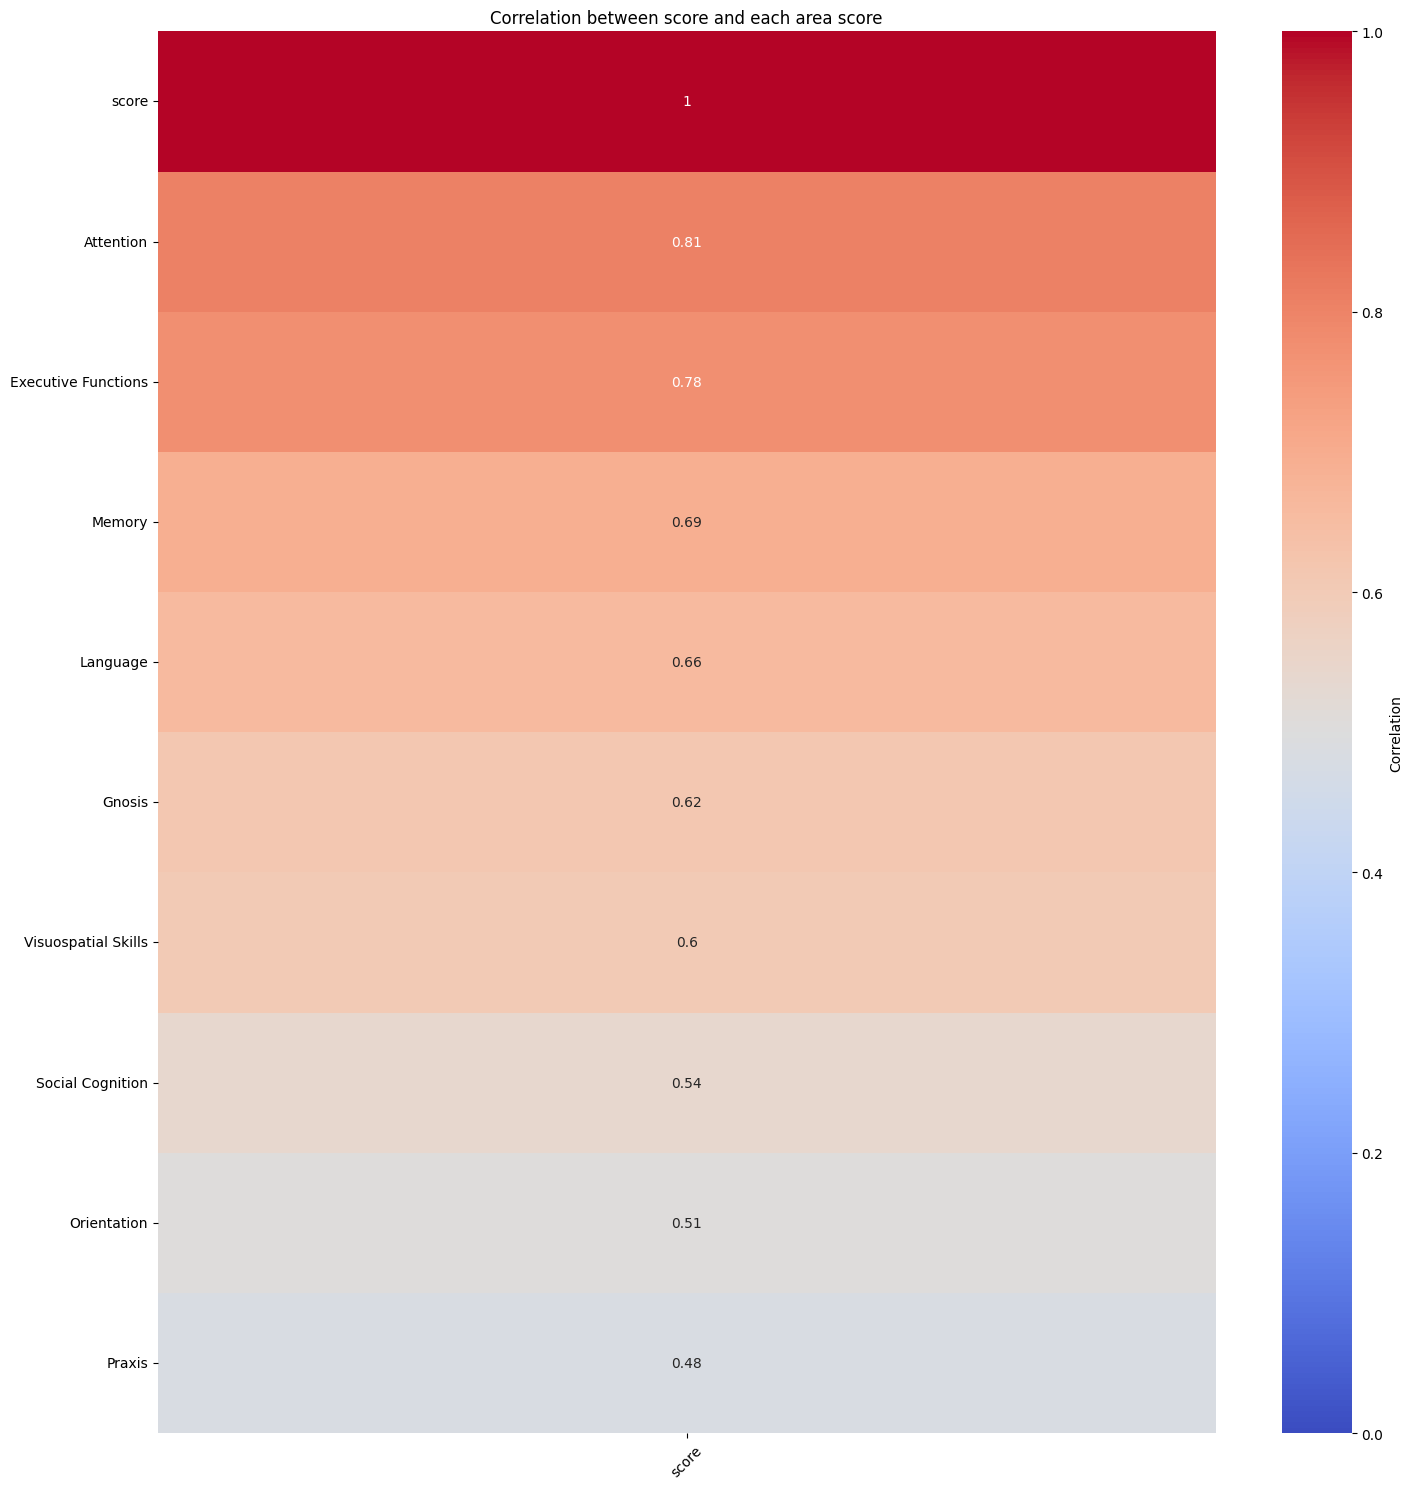

In [58]:
# Assuming 'score' is the column you want to correlate against, and areas are the columns in your DataFrame
areas = df[["Attention", "Executive Functions", "Gnosis", "Language", "Memory", "Orientation", "Praxis", "Visuospatial Skills", "Social Cognition"]].columns

# Calculate correlations
correlations = df[['score'] + list(areas)].corr(method='spearman')

correlations = correlations.sort_values(by='score', ascending=False)

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlations[['score']], annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation'}, vmin=0, vmax=1)

# Set plot properties
plt.title('Correlation between score and each area score')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()